In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from pandas import Series, DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
# Reading the data and understanding the data

In [77]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\rainfall in india 1901-2015.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
df.shape


(4116, 19)

In [5]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [7]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [8]:
df['SUBDIVISION'].nunique()

36

Inference:
1. The dataset has 19 features and 4188 entries
2. Data is from 36 subdivisions of time span starting from 1901 to  2017
3. Data contains monthly, annual and seasonal rainfall data

# Data Preprocessing
1. Feature Engineering

In [48]:
# Creating a new data frame containing mean value of annual rainfall in different subdivisions

x=pd.DataFrame(df.groupby("SUBDIVISION")['ANNUAL'].mean())
x

,ANNUAL
SUBDIVISION,
ANDAMAN & NICOBAR ISLANDS,2927.439423
ARUNACHAL PRADESH,3418.857143
ASSAM & MEGHALAYA,2580.695652
BIHAR,1197.633913
CHHATTISGARH,1371.728696
COASTAL ANDHRA PRADESH,1052.904348
COASTAL KARNATAKA,3408.409649
EAST MADHYA PRADESH,1205.000000
EAST RAJASTHAN,655.215652


In [10]:
x.shape

(36, 1)

In [49]:
x=x.reset_index() 
x

,SUBDIVISION,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2927.439423
1,ARUNACHAL PRADESH,3418.857143
2,ASSAM & MEGHALAYA,2580.695652
3,BIHAR,1197.633913
4,CHHATTISGARH,1371.728696
5,COASTAL ANDHRA PRADESH,1052.904348
6,COASTAL KARNATAKA,3408.409649
7,EAST MADHYA PRADESH,1205.000000
8,EAST RAJASTHAN,655.215652
9,EAST UTTAR PRADESH,979.213043


In [50]:
# Creating a new dataframe by merging df and x 

df1 = df.merge(x, on='SUBDIVISION', how='left')

In [51]:
df1.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_x,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,ANNUAL_y
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2927.439423
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2927.439423
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2927.439423
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2927.439423
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2927.439423


In [84]:
# Assigning mean value of annual rainfall to dataset as a new column

df['MEAN ANNUAL']=df1['ANNUAL_y']

In [85]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2927.439423
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2927.439423
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2927.439423
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2927.439423
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2927.439423


#Creating a new column as Prediction which predicts 'flood', if annual rainfall is 25% greater than mean of annual rainfall of that subdivision, if 25% lesser than the the mean of annual rainfall of that subdivision, predict "drought"  if otherwise 'normal'



In [86]:
#Creating a new column as Prediction which predicts flood as yes(1) if sum of monthly rainfall is greater than 25% of the mean of annual rainfall of that subdivision and no(0) if otherwise
df.loc[df['ANNUAL']>=(df['MEAN ANNUAL']*125/100),'Prediction']="Flood"
df.loc[df['ANNUAL']<=(df['MEAN ANNUAL']*75/100),'Prediction']="Drought"
df['Prediction'].fillna('Normal', inplace=True)


In [87]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL,Prediction
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2927.439423,Normal
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2927.439423,Normal
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2927.439423,Normal
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2927.439423,Normal
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2927.439423,Normal


In [56]:
df.Prediction.nunique()

3

In [57]:
df['Prediction'].value_counts()

Normal     3296
Flood       419
Drought     401
Name: Prediction, dtype: int64

Missing value identification and handling
Numeric Data: Imputing with Mean/Median/Mode/Backward fill/ Forward fill. Null values are replaced with mean/median.mode in this method. 
The mean of the numerical column data is used to replace null values when the data is normally distributed. Median is used if the data comprised of outliers. Mode is used when the data having more occurences of a particular value or more frequent value.

Categorical Data Replacing those null values with most frequent value among them

In [20]:
df.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
MEAN ANNUAL     0
Prediction      0
dtype: int64

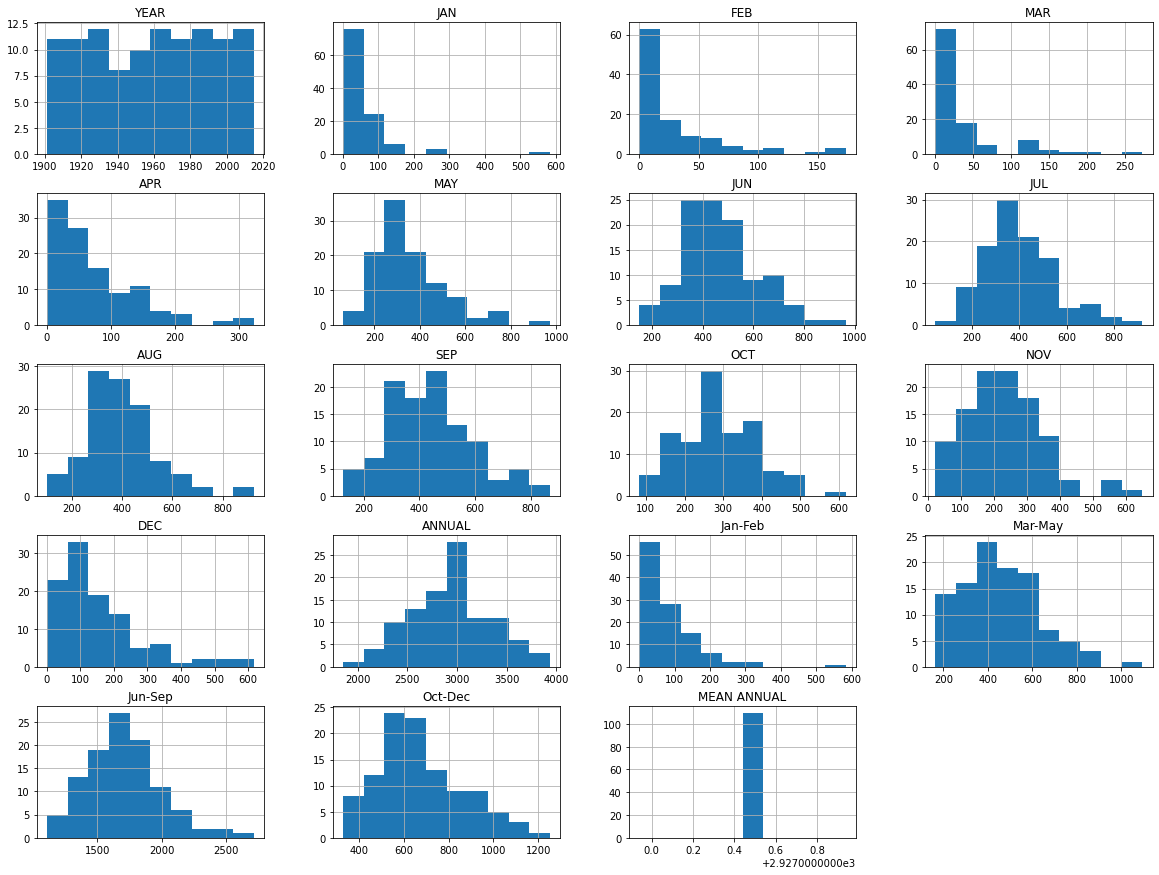

In [21]:
freqgraph=df[df['SUBDIVISION']=='ANDAMAN & NICOBAR ISLANDS']
freqgraph.hist(figsize=(20,15))
plt.show()

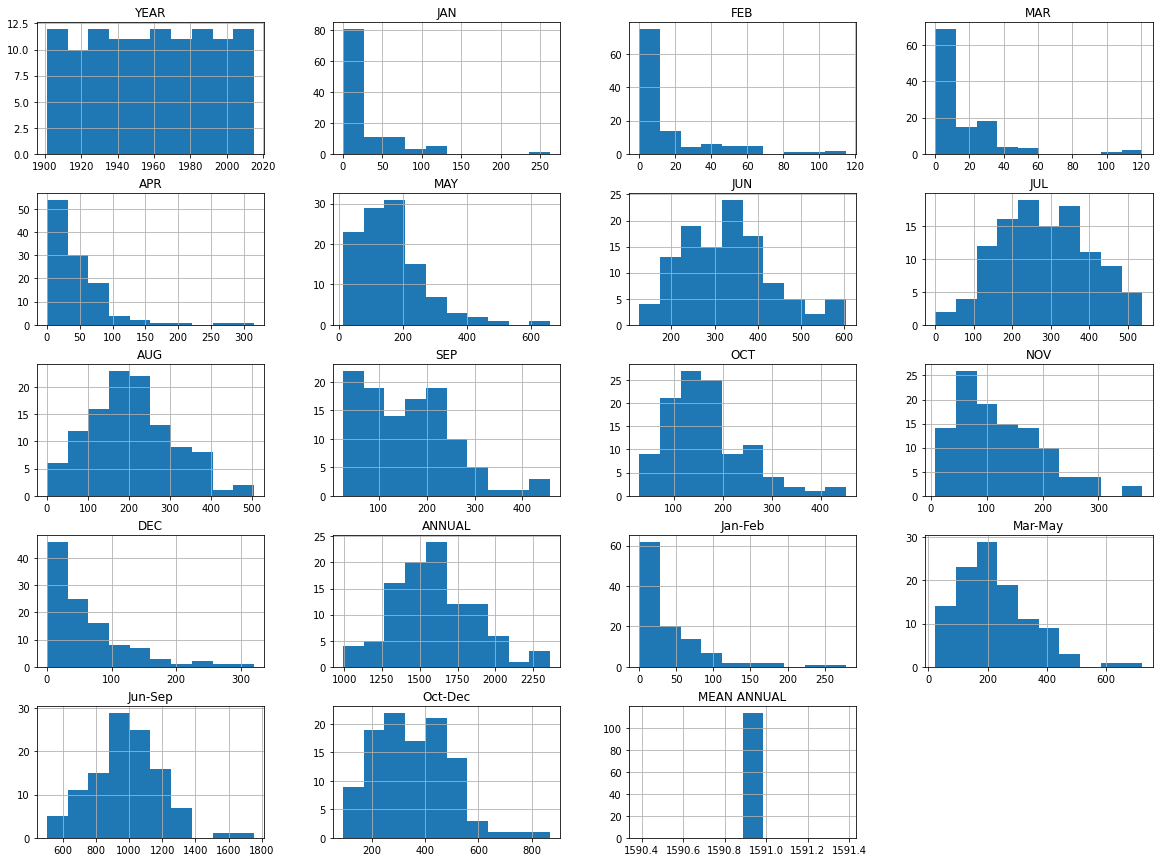

In [22]:
freqgraph=df[df['SUBDIVISION']=='LAKSHADWEEP']
freqgraph.hist(figsize=(20,15))
plt.show()

From the above frequency graph we can see that different parameters have different distribution(mostly normal distribution), so we will be taking mean of the each column in that subdivision to fill missing values

In [58]:
for x in df['SUBDIVISION'].unique():
    for i in ['JAN']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['JAN'].mean()) 
    for i in ['FEB']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['FEB'].mean()) 
    for i in ['MAR']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['MAR'].mean())
    for i in ['APR']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['APR'].mean()) 
    for i in ['MAY']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['MAY'].mean()) 
    for i in ['JUN']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['JUN'].mean()) 
    for i in ['JUL']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['JUL'].mean()) 
    for i in ['AUG']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['AUG'].mean()) 
    for i in ['SEP']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['SEP'].mean())
    for i in ['OCT']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['OCT'].mean()) 
    for i in ['NOV']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['NOV'].mean()) 
    for i in ['DEC']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['DEC'].mean()) 
    for i in ['ANNUAL']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['ANNUAL'].mean()) 
    for i in ['Jan-Feb']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['Jan-Feb'].mean())
    for i in ['Mar-May']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['Mar-May'].mean()) 
    for i in ['Jun-Sep']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['Jun-Sep'].mean()) 
    for i in ['Oct-Dec']:
        df[i]=df[i].fillna(df[df['SUBDIVISION']==x]['Oct-Dec'].mean()) 

In [59]:
df.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
MEAN ANNUAL    0
Prediction     0
dtype: int64

# Exploratory data Analysis

In [25]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'MEAN ANNUAL', 'Prediction'],
      dtype='object')

 Highest Rainfall ever received in a year in Subdivisions

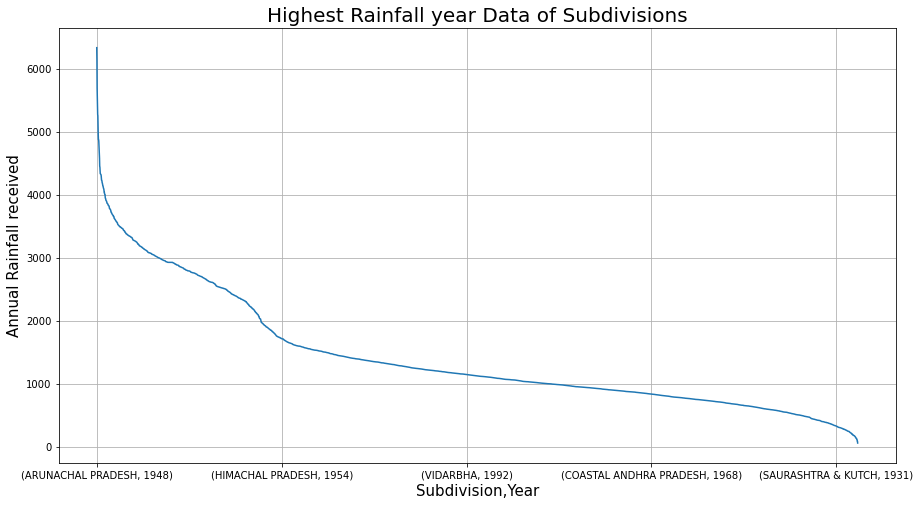

In [26]:
plt.figure(figsize=(15,8))
df.groupby(['SUBDIVISION','YEAR'])['ANNUAL'].sum().sort_values(ascending=False).plot()

plt.grid()
plt.xlabel("Subdivision,Year",fontsize=15)
plt.ylabel("Annual Rainfall received",fontsize=15)
plt.title('Highest Rainfall year Data of Subdivisions',fontsize=20);

Insight:

    Here, the plot represents the analysis of the highest amount of annual rainfall recieved in the states , over the span of years from 1901-2015. From here, we can infer that the highest amount of rainfall ever received in span of given data is in year 1948, in the state Arunachal Pradesh.

 Total amount of rainfall recieved overall by each subdivision

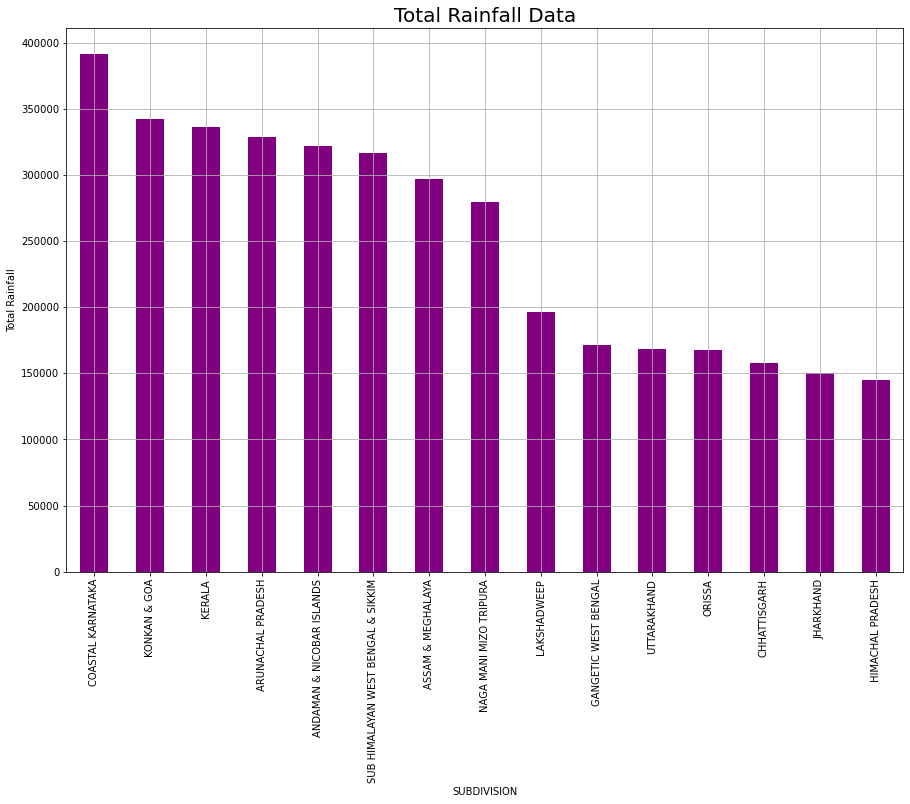

In [27]:
plt.figure(figsize=(15,10))
df.groupby(['SUBDIVISION'])['ANNUAL'].sum().sort_values(ascending=False).head(15).plot(kind='bar', color = 'purple')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall Data',fontsize=20)
plt.grid();

Insight:

Here, the plot represents the analysis of the total amount of annual rainfall recieved in the subdivisions , over the total span of years from 1901-2017. From here, we can infer that the highest amount of rainfall receiving state overall is Coastal Karnataka

The month with the hightest rainfall

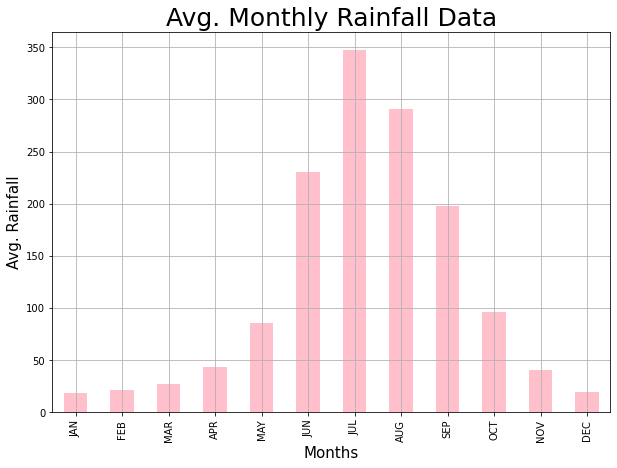

In [28]:
plt.figure(figsize=(10,7))
df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC']].mean().plot(kind= 'bar', color='pink')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Avg. Rainfall',fontsize=15)
plt.title('Avg. Monthly Rainfall Data',fontsize=25)
plt.grid()
plt.show();

Insight:

From graph, we analysed July has the most rainfall on average. By contrast, December and Jan have the least rainfall. Moreover, there are many differences in rainfall amount among months.

Seasonwise Rainfall in India

<Figure size 720x144 with 0 Axes>

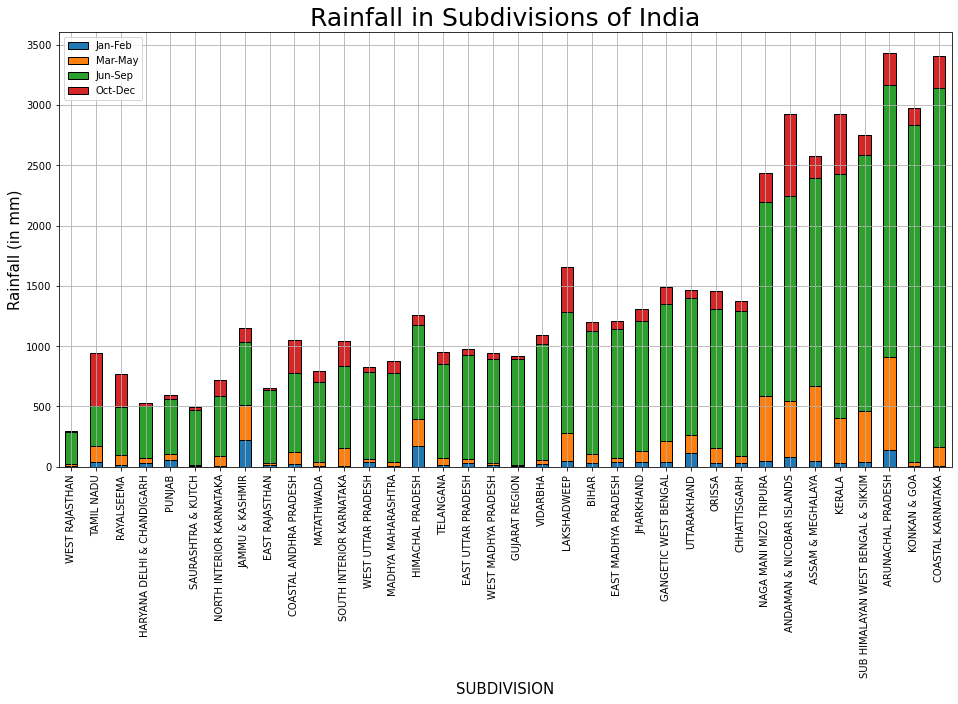

In [29]:
plt.figure(figsize=(10,2))
df[['SUBDIVISION', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby('SUBDIVISION').mean().sort_values('Jun-Sep').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(16,8));
plt.xlabel('SUBDIVISION',fontsize=15)
plt.ylabel('Rainfall (in mm)',fontsize=15)
plt.title('Rainfall in Subdivisions of India',fontsize=25)
plt.grid();

Insight:

The above graph depicts the average rainfall received in each season in varous subdivisions of India. From here, we can conclude about the highest rainfall receiving state of India and can see that in which season our country receives the highest rainfall, which results to be Jun-Sept and thus we sorted the graph according to average amount lof rainfall in this season.

# Heat Map of Rainfall

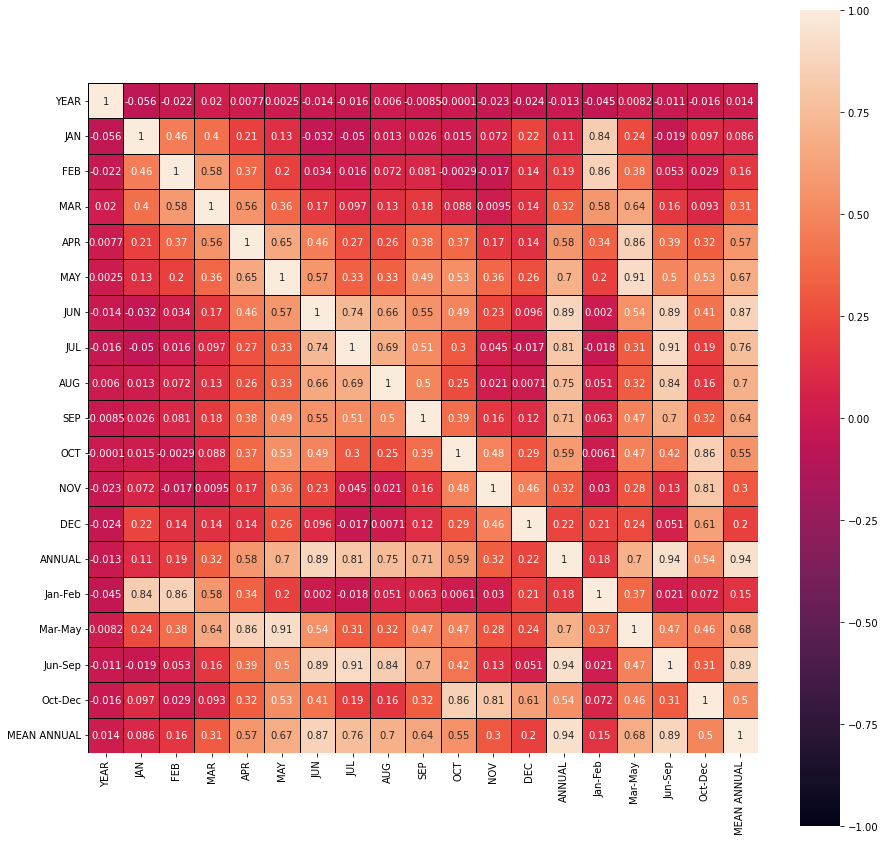

In [30]:
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

Insight:

From here, we can see that Annual rainfall has very high correlation to the rainfall received in the months of Jun-Sep

Box Plot of Annual Rainfall in Subdivisions of India

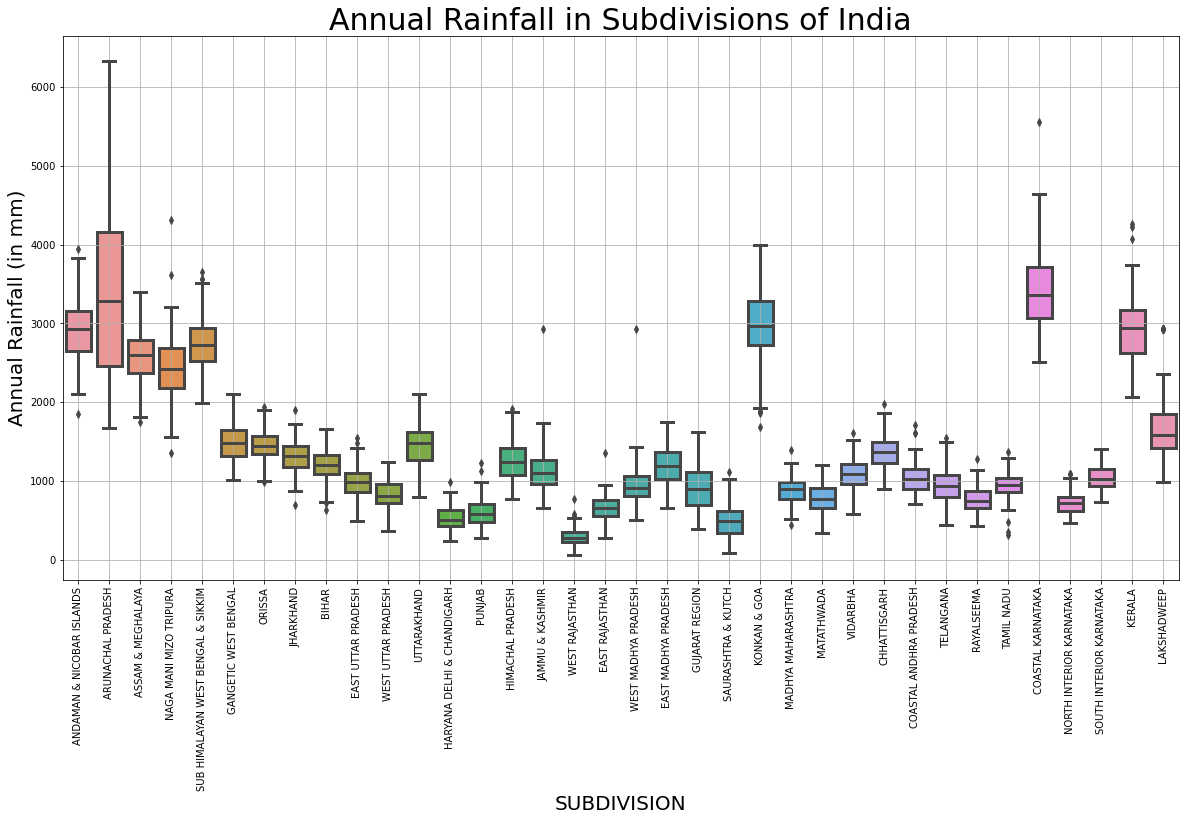

In [31]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=df, width=0.8,linewidth=3);
ax.set_xlabel('SUBDIVISION',fontsize=20)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=30)
ax.tick_params(axis='x',labelsize=10,rotation=90)
ax.tick_params(axis='y',labelsize=10,rotation=0)
plt.grid();


Insights:

From here, we can see that Arunachal Pradesh has recorded maximum rainfall annually but its median is similar to Coastal Karnataka, which means their average of total annual rainfall over years is approximately same, but the highest ever rainfall in a year is received by Arunachal Pradesh.

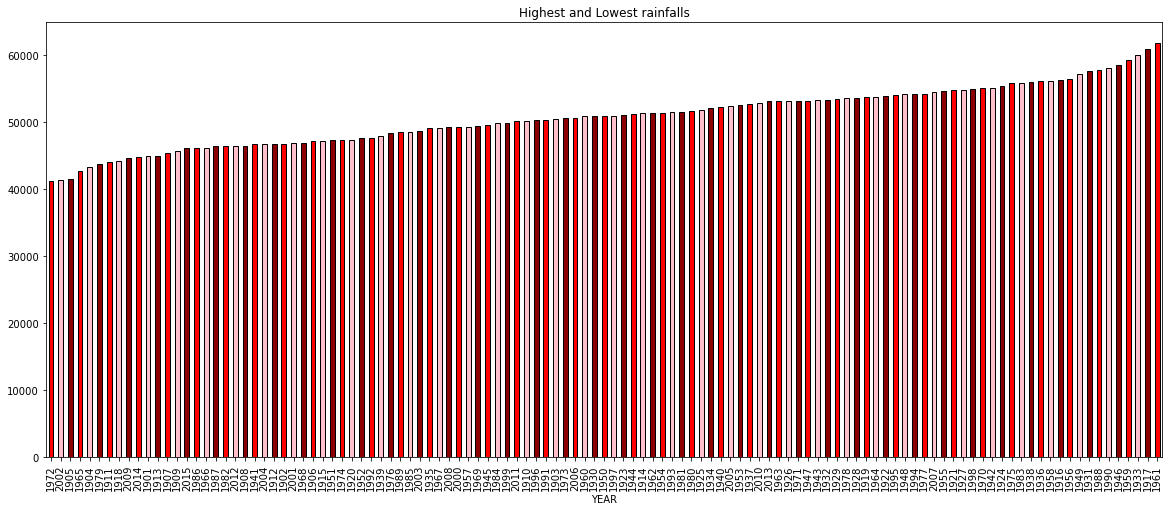

In [32]:
yearly_rainfall = df.groupby(['YEAR']).sum()
x1 = yearly_rainfall.sort_values('ANNUAL')
fig = plt.figure(figsize=(20, 8))
ax = plt.xticks(rotation=90)
ax = x1['ANNUAL'].plot.bar(color=['red', 'pink', 'darkred'], edgecolor = 'black')
ax = plt.title('Highest and Lowest rainfalls')

Inference: 1972 and 2002 were the years with least amount of rainfall. 1933 and 1961 were the years with highest rainfall.

# Outlier detection 

In [33]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'MEAN ANNUAL', 'Prediction'],
      dtype='object')

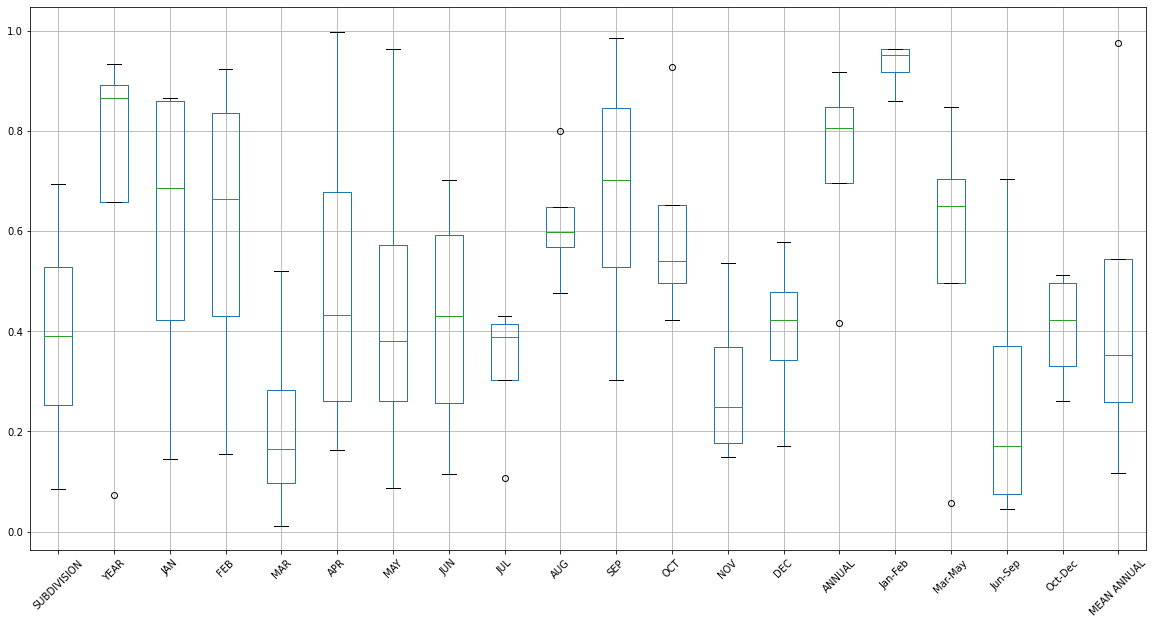

In [60]:
df = pd.DataFrame(data = np.random.random(size=(4,20)), columns = ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'MEAN ANNUAL'],)

df.boxplot();
plt.xticks(rotation=45);

Inference: No outliers are detected in any of the columns

# Encoding


In [62]:
df.dtypes


SUBDIVISION    float64
YEAR           float64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
MEAN ANNUAL    float64
dtype: object

In [78]:
df['SUBDIVISION'].value_counts()

WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH                

In [79]:
label_encoder = LabelEncoder()
 
# Encode labels in column 'Classification'.
df['SUBDIVISION']= label_encoder.fit_transform(df['SUBDIVISION'])
 
df['SUBDIVISION'].unique()

array([ 0,  1,  2, 21, 28, 10, 23, 15,  3,  9, 35, 31, 12, 24, 13, 14, 34,
        8, 33,  7, 11, 26, 17, 19, 20, 32,  4,  5, 30, 25, 29,  6, 22, 27,
       16, 18])

In [80]:
df['SUBDIVISION'].value_counts()

33    115
8     115
6     115
29    115
25    115
30    115
5     115
4     115
32    115
20    115
19    115
17    115
26    115
11    115
7     115
16    115
34    115
27    115
14    115
13    115
24    115
12    115
31    115
35    115
9     115
3     115
15    115
23    115
10    115
28    115
21    115
2     115
22    115
18    114
0     110
1      97
Name: SUBDIVISION, dtype: int64

In [88]:
label_encoder = LabelEncoder()
 
# Encode labels in column 'Classification'.
df['Prediction']= label_encoder.fit_transform(df['Prediction'])
 
df['Prediction'].unique()

array([2, 1, 0])

In [89]:
df['Prediction'].value_counts()

2    3296
1     419
0     401
Name: Prediction, dtype: int64

In [90]:
df.dtypes

SUBDIVISION      int32
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
MEAN ANNUAL    float64
Prediction       int32
dtype: object

In [91]:
df.shape

(4116, 21)